In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import datetime

In [22]:
time_step = 60
len_train_pct = 0.8
len_test_pct = 0.2
future_step = 7
current_date = "2025-06-28"

In [17]:
df_emas = pd.read_csv(f"../data/{current_date}/emas.csv")
df_emas = df_emas[["buy", "updated_at"]]
df_emas.rename(columns={'updated_at': 'date'}, inplace=True)

df_emas["date"] = df_emas["date"].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d"))
df_emas = df_emas.set_index('date')

data = df_emas.sort_values(by='date')

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [26]:
# load model
model = load_model(f"../models/{current_date}/model.h5")

In [31]:
future_steps = 7
last_time_step_days = scaled_data[-time_step:].reshape(1, time_step, 1)

future_predictions = []

for _ in range(future_steps):
    next_pred = model.predict(last_time_step_days)[0][0]
    future_predictions.append(next_pred)

    last_60_days = np.append(last_time_step_days[:, 1:, :], [[[next_pred]]], axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [32]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

In [34]:
future_predictions

array([[1812211.2],
       [1812211.2],
       [1812211.2],
       [1812211.2],
       [1812211.2],
       [1812211.2],
       [1812211.2]], dtype=float32)

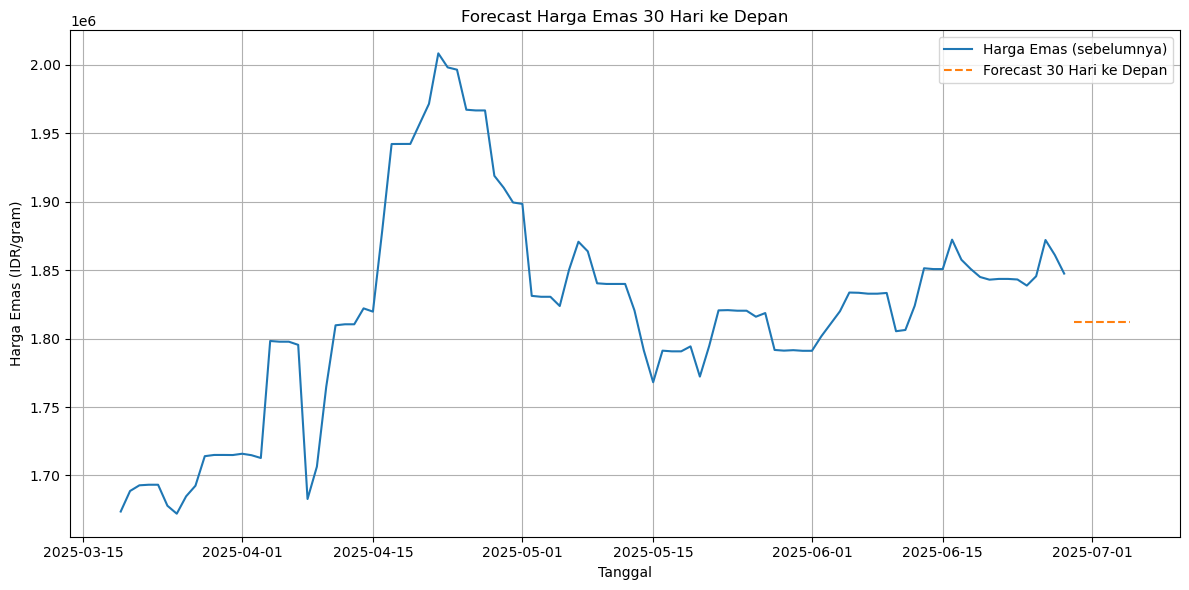

In [33]:
# 12. Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], data['buy'].values[-100:], label='Harga Emas (sebelumnya)')
plt.plot(future_dates, future_predictions, label='Forecast 30 Hari ke Depan', linestyle='--')
plt.title('Forecast Harga Emas 30 Hari ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas (IDR/gram)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
scaled_data

array([[0.00822321],
       [0.00914501],
       [0.00950877],
       ...,
       [0.90604422],
       [0.89849618],
       [0.88914242]])

In [40]:
arr = [1,2,3,4,5,6,7,8,9,10]

# arr[-3:]

np.array(arr).reshape(1, 10, 1)

array([[[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]])